# Setting Up and Verifying TensorFlow with Required Libraries

In [1]:
# Thư viện cần thiết
import numpy as np  # Thư viện NumPy dùng để làm việc với mảng và các phép toán ma trận
import matplotlib.pyplot as plt  # Thư viện matplotlib để vẽ đồ thị và hình ảnh
import tensorflow  # Thư viện TensorFlow để xây dựng và huấn luyện mô hình học sâu

# Import các lớp cần thiết từ TensorFlow Keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, GlobalAvgPool2D, DepthwiseConv2D, ReLU
# - Input: Lớp nhập dữ liệu vào mô hình
# - Conv2D: Lớp Convolution 2D dùng để thực hiện phép tích chập (Convolution) trên ảnh
# - MaxPool2D: Lớp Max Pooling 2D dùng để giảm chiều kích thước của ảnh sau phép tích chập
# - Dense: Lớp Fully Connected (FC), dùng cho các lớp cuối trong mạng
# - Flatten: Lớp Flatten để chuyển đổi đầu ra của các lớp convolution và pooling thành dạng một chiều
# - BatchNormalization: Lớp chuẩn hóa batch giúp cải thiện hiệu suất huấn luyện
# - GlobalAvgPool2D: Lớp Global Average Pooling 2D để giảm chiều dữ liệu (công cụ pooling toàn cục)
# - DepthwiseConv2D: Lớp Depthwise Convolution 2D dùng cho phép tích chập chuyên biệt cho mỗi kênh đầu vào
# - ReLU: Lớp kích hoạt ReLU (Rectified Linear Unit), thường dùng trong các mạng nơ-ron

from tensorflow.keras.models import Model  # Lớp Model dùng để tạo và huấn luyện mô hình
import glob  # Thư viện glob để làm việc với các đường dẫn tệp tin (file paths)


2025-03-15 18:34:39.847667: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-15 18:34:39.855645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742038479.864519   17282 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742038479.867079   17282 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-15 18:34:39.876022: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
tensorflow.__version__

'2.18.0'

# Prepare Data

In [3]:
import cv2 as cv

In [4]:
import os
# lấy danh sách đường dẫn
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir) if os.path.isdir(os.path.join(a_dir, name))]

### **Giải thích chi tiết đoạn code:**

- **Mô tả:** Import thư viện `os`, cung cấp các chức năng để tương tác với hệ điều hành.
- **Mục đích:** Dùng để làm việc với hệ thống file và thư mục.

- **Mô tả:** Định nghĩa một hàm có tên `get_immediate_subdirectories` với một tham số `a_dir`.
- **Mục đích:** Trả về danh sách các thư mục con (subdirectories) nằm trực tiếp trong `a_dir` (không bao gồm các file).

- **`os.listdir(a_dir)`**:  
  - Trả về danh sách **tất cả các file và thư mục** trong thư mục `a_dir` (không phân biệt thư mục hay file).
  
- **Duyệt từng `name` trong danh sách trên**:
  - `os.path.join(a_dir, name)`: Kết hợp `a_dir` với `name` để tạo đường dẫn đầy đủ (`full_path`).
  - `os.path.isdir(full_path)`: Kiểm tra xem `full_path` có phải là thư mục không.
  - **Nếu `name` là thư mục**, nó sẽ được thêm vào danh sách trả về.

### **Tóm tắt** 
**Hàm `get_immediate_subdirectories(a_dir)`** trả về danh sách **các thư mục con trực tiếp** của `a_dir` (bỏ qua file).

**Công dụng:** Hữu ích khi cần liệt kê các thư mục con trong một thư mục cha để xử lý dữ liệu, duyệt thư mục, hoặc tổ chức file

In [5]:
def getData( link ):

  # Khoi tao danh sach chua du lieu, x la anh, y la nhan
  X = []  #Image
  y = []  #Label

  list_name = get_immediate_subdirectories(link)
  # Ham get_immediate_subdirectories(link) tra ve danh sach (list) cac thu muc con co trong link, moi thu muc con chua anh cua lop, ten thu muc lam nhan

  for label in list_name: #Duyet qua list cac nhan
    # lấy link ảnh
    for file_name in glob.glob(link + "/" + label+"/*"):
      img = cv.imread(file_name)
      # đọc ảnh, OpenCV đọc ảnh mặc định ở định dạng BGR.
      img_cvt = cv.cvtColor(img,cv.COLOR_BGR2RGB)
      # chuyển về dạng RGB
      img_cvt = cv.resize(img_cvt,(224,224))
      # đưa về size 224 X 224 x 3, kích thước này thường dùng trong mô hình deep learning như ResNet, VGG, MobileNet.
      X.append(img_cvt)
      y.append(label)

  return X,y

- Hàm `getData(link)` nhận một đường dẫn link chứa nhiều thư mục con (mỗi thư mục chứa ảnh của một lớp).
- Trả về:
  - X: Danh sách ảnh đã được xử lý.
  - y: Danh sách nhãn tương ứng của ảnh.

In [6]:
#lấy từng bộ data
X_train, y_train = getData("Vegetable Images Dataset/train")
X_test, y_test = getData("Vegetable Images Dataset/test")
X_val, y_val = getData("Vegetable Images Dataset/validation")

In [7]:
# Chuyển về dạng array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [8]:
#Kiểm tra shape của các tập
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((15000, 224, 224, 3),
 (15000,),
 (3000, 224, 224, 3),
 (3000,),
 (3000, 224, 224, 3),
 (3000,))

In [9]:
# In ra kiểu dữ liệu và số lượng điểm dữ liệu của các tập
print("Training set:")
print(f"X_train type: {type(X_train)}, Length: {len(X_train)}")
print(f"y_train type: {type(y_train)}, Length: {len(y_train)}")

print("\nTesting set:")
print(f"X_test type: {type(X_test)}, Length: {len(X_test)}")
print(f"y_test type: {type(y_test)}, Length: {len(y_test)}")

print("\nValidation set:")
print(f"X_val type: {type(X_val)}, Length: {len(X_val)}")
print(f"y_val type: {type(y_val)}, Length: {len(y_val)}")

Training set:
X_train type: <class 'numpy.ndarray'>, Length: 15000
y_train type: <class 'numpy.ndarray'>, Length: 15000

Testing set:
X_test type: <class 'numpy.ndarray'>, Length: 3000
y_test type: <class 'numpy.ndarray'>, Length: 3000

Validation set:
X_val type: <class 'numpy.ndarray'>, Length: 3000
y_val type: <class 'numpy.ndarray'>, Length: 3000


In [10]:
# Chọn một ảnh ngẫu nhiên từ tập X_train
index = np.random.randint(0, len(X_train))  # Chọn một index ngẫu nhiên
image = X_train[index]  # Lấy ảnh từ danh sách X_train
label = y_train[index]  # Lấy nhãn tương ứng

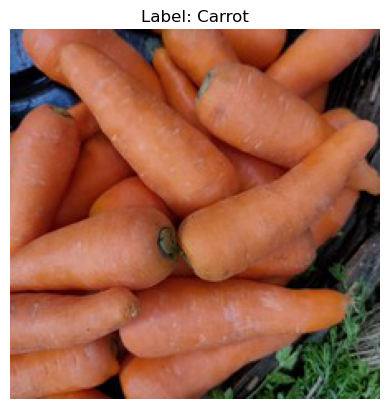

In [11]:
# Hiển thị ảnh
plt.imshow(image)
plt.title(f"Label: {label}")  # Hiển thị nhãn của ảnh
plt.axis("off")  # Ẩn trục tọa độ
plt.show()

In [12]:
from tensorflow.keras.utils import to_categorical # Dùng để chuyển nhãn dạng số nguyên thành dạng one-hot vector (chưa sử dụng trong đoạn code này).

# Tạo một danh sách các nhãn dạng số nguyên
labels = np.arange(15) # Tạo một danh sách các số nguyên từ 0 đến 14 (tức là có 15 nhãn).
# Lấy danh sách label
names = np.unique(y_train) # Trả về danh sách các nhãn duy nhất có trong y_train (tên thư mục ban đầu).

name_label={} # Ánh xạ từ tên nhãn → số nguyên
label_name = {} # Ánh xạ từ số nguyên → tên nhãn
for i in range(15):
  name_label[names[i]] = labels[i]
  label_name[labels[i]] = names[i]
y_train_encode = []
y_test_encode = []
y_val_encode = []
for label in y_train:
  y_train_encode.append( name_label[label] )
for label in y_val:
  y_val_encode.append( name_label[label] )
for label in y_test:
  y_test_encode.append( name_label[label] )

y_train_encode = np.array(y_train_encode)
y_test_encode = np.array(y_test_encode)
y_val_encode = np.array(y_val_encode)

#đưa về dạng vecto 1 chieu
y_train_encode = np.reshape(y_train_encode,(y_train_encode.shape[0],1))
y_val_encode = np.reshape(y_val_encode,(y_val_encode.shape[0],1))
y_test_encode = np.reshape(y_test_encode,(y_test_encode.shape[0],1))

In [13]:
# In ra 15 nhãn
label_name

{0: 'Bean',
 1: 'Bitter_Gourd',
 2: 'Bottle_Gourd',
 3: 'Brinjal',
 4: 'Broccoli',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cucumber',
 10: 'Papaya',
 11: 'Potato',
 12: 'Pumpkin',
 13: 'Radish',
 14: 'Tomato'}

In [14]:
from tensorflow.keras import layers
# input_shape: kich thuoc anh dau vao, n_classes: so lop phan loai
def mobilenet(input_shape, n_classes):
    # khoi mobilenet, gom depthwise convolution de giam so luong trong so va  pointwise convolution de lam tang chieu sau
    # giam so lượng trọng số giúp giảm bộ nhớ cho mô hình
    # tăng chiều sấu cho feature map để trích xuất các đặc trưng phức từ từ ảnh giúp tăng độ chính xác và hiệu suất cảu mô hình
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    #  Với mỗi kênh đầu vào, lớp này sẽ áp dụng một kernel (bộ lọc) duy nhất để tính toán output cho kênh đó.
    #Điều này giúp giảm số lượng tham số trong mô hình và tăng tốc độ tính toán
    x = BatchNormalization()(x)
    #chuẩn hóa giá trị đầu vào trên mỗi batch dữ liệu bằng cách trung bình hóa giá trị đầu vào trên batch và phép chia chuẩn hóa đó.
    x = ReLU()(x)
    # giữ lại đặc trưng quan trọng

    x = Conv2D(f, 1, strides=1, padding='same')(x)
    #kết hợp các thông tin đặc trưng giữa các kênh của tensor x lại với nhau, tạo ra một tensor đầu ra mới với số lượng kênh là f
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x


  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  #  lớp convolution với 32 bộ lọc, kích thước bộ lọc là 3x3, bước trượt là 2 và độ lề là same.

  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)
  x = layers.Dropout(0.3)(x)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)
  x = layers.Dropout(0.3)(x)

  x = mobilenet_block(x, 256, 2)
  for _ in range(5):
    x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  x = mobilenet_block(x, 512)

  x = GlobalAvgPool2D()(x)
  # thực hiện phép pooling toàn cục (global average pooling) trên đầu ra của lớp trước đó.

  output = Dense(n_classes)(x)
  #là lớp fully connected với số lượng đầu ra là n_classes

  model = Model(input, output)
  return model

In [15]:
model = mobilenet((224,224,3),15)
model.summary()

I0000 00:00:1742038490.278255   17282 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9631 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 112, 112, 32)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 56, 56, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 56, 56, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 977,807 (3.73 MB)

 Trainable params: 965,135 (3.68 MB)

 Non-trainable params: 12,672 (49.50 KB)

In [16]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Định nghĩa số epochs
epochs = 20

# Thiết lập callback để lưu model có val_accuracy cao nhất
checkpoint = ModelCheckpoint(filepath='final_best_model.keras', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Compile mô hình
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Huấn luyện mô hình với callback
history = model.fit(X_train, y_train_encode, 
                    epochs=epochs, 
                    batch_size=64, 
                    validation_data=(X_val, y_val_encode), 
                    callbacks=[checkpoint])

Epoch 1/20


I0000 00:00:1742038497.165858   17405 service.cc:148] XLA service 0x79630c0586c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742038497.165871   17405 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-03-15 18:34:57.325922: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742038498.051968   17405 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-15 18:34:58.748089: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5723', 8 bytes spill stores, 8 bytes spill loads



  3/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.0668 - loss: 2.8074 

I0000 00:00:1742038507.808045   17405 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3630 - loss: 1.9207
Epoch 1: val_accuracy improved from -inf to 0.06667, saving model to final_best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.3638 - loss: 1.9183 - val_accuracy: 0.0667 - val_loss: 3.6145
Epoch 2/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8339 - loss: 0.5216
Epoch 2: val_accuracy did not improve from 0.06667
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8342 - loss: 0.5209 - val_accuracy: 0.0667 - val_loss: 6.0987
Epoch 3/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9253 - loss: 0.2368
Epoch 3: val_accuracy improved from 0.06667 to 0.58600, saving model to final_best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.9254 - loss: 0.2367 - val_accuracy: 0.5860 - val_loss: 1.6438
Epoch 4/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9498 - loss: 0.1690
Epoch 4: val_accuracy improved from 0.58600 to 0.79933, saving mode

Highest Training Accuracy: 0.9929 at epoch 20
Highest Validation Accuracy: 0.9903 at epoch 20
Lowest Training Loss: 0.0234 at epoch 20
Lowest Validation Loss: 0.0290 at epoch 20


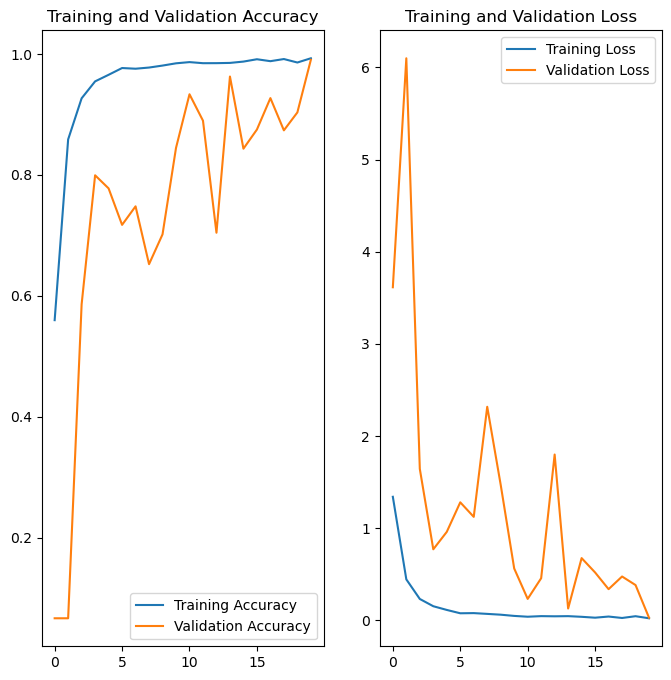

In [17]:
# Lấy giá trị accuracy và loss trong quá trình huấn luyện và kiểm tra (validation)
acc = history.history['accuracy']  # Độ chính xác trong quá trình huấn luyện
val_acc = history.history['val_accuracy']  # Độ chính xác trong quá trình kiểm tra (validation)

loss = history.history['loss']  # Mất mát trong quá trình huấn luyện
val_loss = history.history['val_loss']  # Mất mát trong quá trình kiểm tra (validation)

# Tạo dãy số cho các epoch
epochs_range = range(epochs)  # Số lượng epoch trong quá trình huấn luyện

# Vẽ biểu đồ
plt.figure(figsize=(8, 8))  # Cấu hình kích thước của hình ảnh (8x8 inches)

# Biểu đồ 1: Độ chính xác trong huấn luyện và kiểm tra
plt.subplot(1, 2, 1)  # Tạo một biểu đồ phụ, chia đôi màn hình (1 hàng, 2 cột)
plt.plot(epochs_range, acc, label='Training Accuracy')  # Vẽ độ chính xác trong huấn luyện
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # Vẽ độ chính xác trong kiểm tra
plt.legend(loc='lower right')  # Hiển thị chú thích ở góc dưới bên phải
plt.title('Training and Validation Accuracy')  # Tiêu đề cho biểu đồ độ chính xác

# Biểu đồ 2: Mất mát trong huấn luyện và kiểm tra
plt.subplot(1, 2, 2)  # Biểu đồ phụ thứ 2
plt.plot(epochs_range, loss, label='Training Loss')  # Vẽ mất mát trong huấn luyện
plt.plot(epochs_range, val_loss, label='Validation Loss')  # Vẽ mất mát trong kiểm tra
plt.legend(loc='upper right')  # Hiển thị chú thích ở góc trên bên phải
plt.title('Training and Validation Loss')  # Tiêu đề cho biểu đồ mất mát

# Tìm và hiển thị giá trị cao nhất của độ chính xác và mất mát
max_acc_epoch = np.argmax(acc)  # Tìm epoch có độ chính xác cao nhất trong quá trình huấn luyện
max_acc_value = acc[max_acc_epoch]  # Giá trị độ chính xác cao nhất

max_val_acc_epoch = np.argmax(val_acc)  # Tìm epoch có độ chính xác cao nhất trong quá trình kiểm tra
max_val_acc_value = val_acc[max_val_acc_epoch]  # Giá trị độ chính xác cao nhất trong kiểm tra

max_loss_epoch = np.argmin(loss)  # Tìm epoch có mất mát thấp nhất trong quá trình huấn luyện
max_loss_value = loss[max_loss_epoch]  # Giá trị mất mát thấp nhất

max_val_loss_epoch = np.argmin(val_loss)  # Tìm epoch có mất mát thấp nhất trong quá trình kiểm tra
max_val_loss_value = val_loss[max_val_loss_epoch]  # Giá trị mất mát thấp nhất trong kiểm tra

# In ra các giá trị và epoch tương ứng
print(f"Highest Training Accuracy: {max_acc_value:.4f} at epoch {max_acc_epoch+1}")
print(f"Highest Validation Accuracy: {max_val_acc_value:.4f} at epoch {max_val_acc_epoch+1}")
print(f"Lowest Training Loss: {max_loss_value:.4f} at epoch {max_loss_epoch+1}")
print(f"Lowest Validation Loss: {max_val_loss_value:.4f} at epoch {max_val_loss_epoch+1}")

# Hiển thị các biểu đồ
plt.show()


In [34]:
final_model = tensorflow.keras.models.load_model("final_best_model.keras")

In [35]:
# Đánh giá model trên tập train
final_model.evaluate(X_train, y_train_encode)

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9985 - loss: 0.0057


[0.00818296056240797, 0.9977999925613403]

In [36]:
# Đánh giá model trên tập validation
final_model.evaluate(X_val, y_val_encode)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9927 - loss: 0.0232


[0.02898942120373249, 0.9903333187103271]

In [37]:
# Đánh giá model trên tập test
final_model.evaluate(X_test,y_test_encode)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9939 - loss: 0.0234


[0.0412733256816864, 0.9900000095367432]

In [26]:
out = final_model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [27]:
output = np.zeros((y_test_encode.shape))
for i in range(out.shape[0]):
    output[i] = np.argmax(out[i])

In [28]:
X_test.shape, y_test_encode.shape, output.shape

((3000, 224, 224, 3), (3000, 1), (3000, 1))

In [29]:
output

array([[ 5.],
       [ 5.],
       [ 5.],
       ...,
       [13.],
       [13.],
       [13.]])

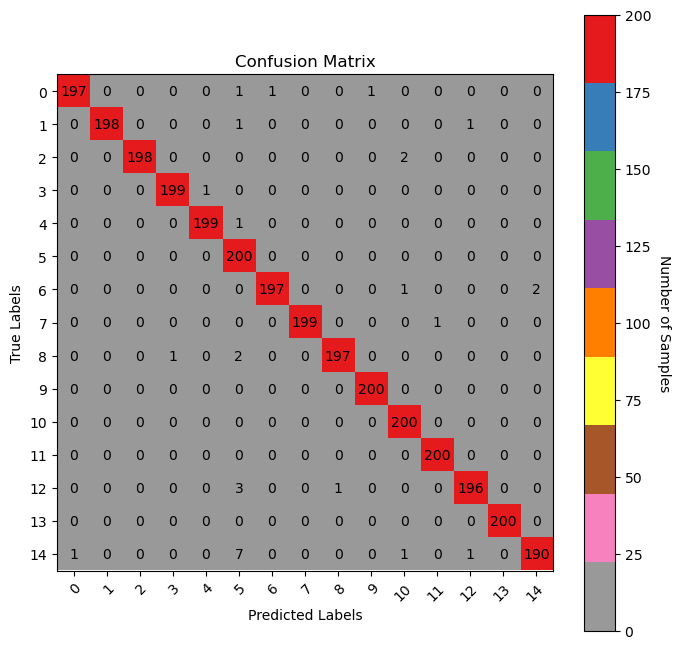

In [30]:
import numpy as np  # Thư viện NumPy, dùng để xử lý mảng và phép toán ma trận
import matplotlib.pyplot as plt  # Thư viện matplotlib để vẽ đồ thị
from sklearn.metrics import confusion_matrix  # Hàm confusion_matrix để tính ma trận nhầm lẫn (confusion matrix)

# Nhãn thực tế (ground truth)
y_true = y_test_encode  # Các nhãn thực tế của tập kiểm tra (y_test_encode)

# Nhãn dự đoán (predicted labels)
y_pred = output  # Các nhãn dự đoán từ mô hình

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred)  # Tính toán ma trận nhầm lẫn giữa nhãn thực tế và nhãn dự đoán

# Định nghĩa nhãn cho việc vẽ đồ thị
labels = [str(i) for i in range(15)]  # Tạo danh sách nhãn từ 0 đến 14 (vì có 15 lớp)

# Vẽ ma trận nhầm lẫn
fig, ax = plt.subplots(figsize=(8, 8))  # Tạo đồ thị với kích thước 8x8 inch
im = ax.imshow(cm, cmap='Set1_r')  # Hiển thị ma trận nhầm lẫn dưới dạng ảnh với màu sắc

# Hiển thị các chỉ số trên trục x và y và gán nhãn cho các trục tương ứng
ax.set_xticks(np.arange(len(labels)))  # Đặt vị trí các chỉ số trên trục x
ax.set_yticks(np.arange(len(labels)))  # Đặt vị trí các chỉ số trên trục y
ax.set_xticklabels(labels)  # Gán nhãn cho trục x
ax.set_yticklabels(labels)  # Gán nhãn cho trục y

# Xoay các nhãn trên trục x và điều chỉnh vị trí các nhãn
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")  # Xoay nhãn trục x 45 độ và căn chỉnh chúng

# Duyệt qua các giá trị trong ma trận nhầm lẫn và tạo các chú thích văn bản
for i in range(len(labels)):  # Duyệt qua tất cả các hàng
    for j in range(len(labels)):  # Duyệt qua tất cả các cột
        text = ax.text(j, i, cm[i, j],  # Thêm số vào mỗi ô trong ma trận nhầm lẫn
                       ha="center", va="center", color="black")  # Căn giữa và đặt màu chữ là đen

# Đặt tiêu đề và nhãn cho các trục
ax.set_title("Confusion Matrix")  # Tiêu đề cho ma trận nhầm lẫn
ax.set_xlabel("Predicted Labels")  # Nhãn cho trục x (Nhãn dự đoán)
ax.set_ylabel("True Labels")  # Nhãn cho trục y (Nhãn thực tế)

# Thêm thanh màu (colorbar) để biểu thị số lượng mẫu
cbar = ax.figure.colorbar(im, ax=ax)  # Thêm thanh màu
cbar.ax.set_ylabel("Number of Samples", rotation=-90, va="bottom")  # Đặt nhãn cho thanh màu

# Hiển thị đồ thị
plt.show()  # Hiển thị ma trận nhầm lẫn



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
Cabbage


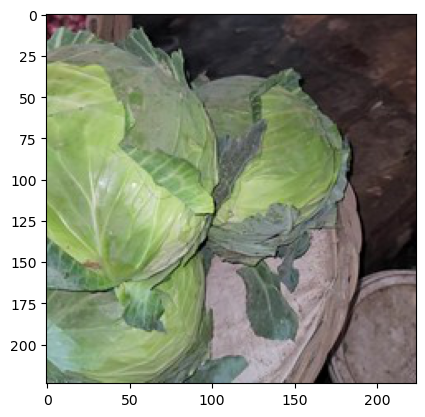

In [31]:
index = np.random.randint(X_test.shape[0])

# img = cv.imread(X_test[index])
# img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# img_resize = cv.resize(img_cvt,(224,224))

list_img = []
list_img.append(X_test[index])
list_img = np.array(list_img)
pred = final_model.predict(list_img)
pred_labels = np.argmax(pred, axis=1)
print(label_name.get(pred_labels[0]))

plt.imshow(X_test[index])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[ -5.237337    -8.02983     -1.3874055   -0.9065538   -1.175262
   -1.562582    -0.9150002   -6.3227935   -4.636493    -0.30586994
   14.192887   -10.699759    -7.1210494   -6.207412    -3.5994773 ]]
Papaya


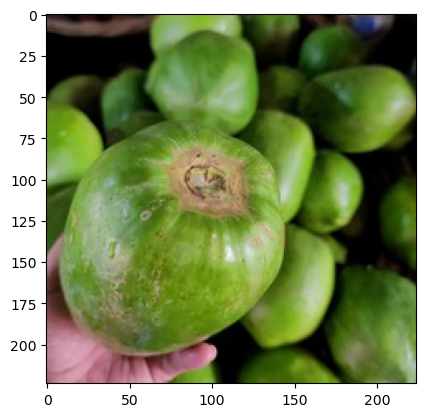

In [32]:
import cv2 as cv
img = cv.imread("Vegetable Images Dataset/test/Papaya/1198.jpg")
img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_resize = cv.resize(img_cvt,(224,224))

list_img = []
list_img.append(img_resize)
list_img = np.array(list_img)
pred = final_model.predict(list_img)
print(pred)

pred_labels = np.argmax(pred, axis=1)
print(label_name.get(pred_labels[0]))

plt.imshow(img_resize)
plt.show()

In [33]:
img = cv.imread("Vegetable Images Dataset/test/Papaya/1198.jpg")

# Test model Website

In [22]:
test_model = tensorflow.keras.models.load_model("mobilenet_model.h5")

In [23]:
test_model.evaluate(X_train, y_train_encode)

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9804 - loss: 0.0766


[0.11121772229671478, 0.9711999893188477]

In [24]:
test_model.evaluate(X_val, y_val_encode)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9856 - loss: 0.0479


[0.0739738717675209, 0.9786666631698608]

In [25]:
test_model.evaluate(X_test,y_test_encode)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9796 - loss: 0.0802


[0.1001797467470169, 0.9729999899864197]